In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [2]:
read_data = pd.read_csv('heart.csv')
print(read_data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0     63    1   3     145   233    1        0       150      0      2.3   
1     37    1   2     130   250    0        1       187      0      3.5   
2     41    0   1     130   204    0        0       172      0      1.4   
3     56    1   1     120   236    0        1       178      0      0.8   
4     57    0   0     120   354    0        1       163      1      0.6   
..   ...  ...  ..     ...   ...  ...      ...       ...    ...      ...   
298   57    0   0     140   241    0        1       123      1      0.2   
299   45    1   3     110   264    0        1       132      0      1.2   
300   68    1   0     144   193    1        1       141      0      3.4   
301   57    1   0     130   131    0        1       115      1      1.2   
302   57    0   1     130   236    0        0       174      0      0.0   

     slope  caa  thall  output  
0        0    0      1       1  
1        0    0      2       1  


In [72]:
read_data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
read_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
read_data.shape

(303, 14)

In [6]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
read_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
read_data.dropna(inplace = True)

In [9]:
read_data.drop_duplicates(inplace = True)

In [10]:
read_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
caa         0
thall       0
output      0
dtype: int64

In [11]:
read_data['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [12]:
read_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [18]:
x = read_data.drop(['output'], axis = 1)
y = read_data['output']

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2 , random_state=5)

In [20]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [23]:
model.score(xtrain, ytrain)

0.8464730290456431

In [24]:
model.score(xtest, ytest)

0.819672131147541

In [25]:
y_train_pred = model.predict(xtrain)


In [26]:
y_test_pred = model.predict(xtest)

In [27]:
accuracy_score(ytrain, y_train_pred)

0.8464730290456431

In [28]:
accuracy_score(ytest, y_test_pred)

0.819672131147541

In [29]:
mean_squared_error(ytrain, y_train_pred)

0.15352697095435686

In [30]:
mean_squared_error(ytest, y_test_pred)

0.18032786885245902

In [31]:
a = classification_report(ytest, y_test_pred)
print(a)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [85]:
data = """
63	1	3	145	233	1	0	150	0	2.3	0	0	1	
37	1	2	130	250	0	1	187	0	3.5	0	0	2	
41	0	1	130	204	0	0	172	0	1.4	2	0	2	
56	1	1	120	236	0	1	178	0	0.8	2	0	2	
57	0	0	120	354	0	1	163	1	0.6	2	0	2	
57	1	0	140	192	0	1	148	0	0.4	1	0	1	
56	0	1	140	294	0	0	153	0	1.3	1	0	2	
44	1	1	120	263	0	1	173	0	0.0	2	0	3	
52	1	2	172	199	1	1	162	0	0.5	2	0	3	
57	1	2	150	168	0	1	174	0	1.6	2	0	2	
54	1	0	140	239	0	1	160	0	1.2	2	0	2	
48	0	2	130	275	0	1	139	0	0.2	2	0	2	
49	1	1	130	266	0	1	171	0	0.6	2	0	2	
64	1	3	110	211	0	0	144	1	1.8	1	0	2	
58	0	3	150	283	1	0	162	0	1.0	2	0	2	"""

# Split the data into lines
lines = data.strip().split('\n')

# Initialize an empty list to store arrays
arrays = []
count = 0
# Iterate over each line and split it into values, converting them to appropriate types
for line in lines:
    # Split the line using tabs and remove any leading/trailing whitespace from the values
    values = line.strip().split('\t')
    # Filter out any empty strings from the values list
    values = [value for value in values if value.strip()]
    # Convert values to integers or floats as appropriate
    values = [int(value) if value.isdigit() else float(value) for value in values]
    arrays.append(values)

# Print the arrays
for array in arrays:
    print(array)
    input_features = [array]
    numpy_array = np.array(input_features)
    reshape_array = numpy_array.reshape(1,-1)
    prediction = model.predict(reshape_array)
    print(prediction)
    if prediction[0] == 0:
      print("you have lower risk of getting heart attack")
    else:
      print("Warning! you have high risk of getting heart attack")
      count = count + 1
      
print("Predict correct ",count)

[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
[0]
you have lower risk of getting heart attack
[37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]
[0]
you have lower risk of getting heart attack
[41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]
[0]
you have lower risk of getting heart attack
[57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1]
[0]
you have lower risk of getting heart attack
[56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2]
[0]
you have lower risk of getting heart attack
[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]
[0]
you have lower risk of getting heart attack
[52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3]
[0]
you have lower risk of getting heart attack
[57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[54, 1

In [ ]:
if prediction[0] == 0:
    print("you have lower risk of getting heart attack")
else:
    print("Warning! you have high risk of getting heart attack")

In [32]:
c = confusion_matrix(ytest, y_test_pred)
print(c)

[[26  8]
 [ 3 24]]


In [33]:
import pickle
with open('project_model.pkl', 'wb') as file:
    pickle.dump(model, file)

<Axes: >

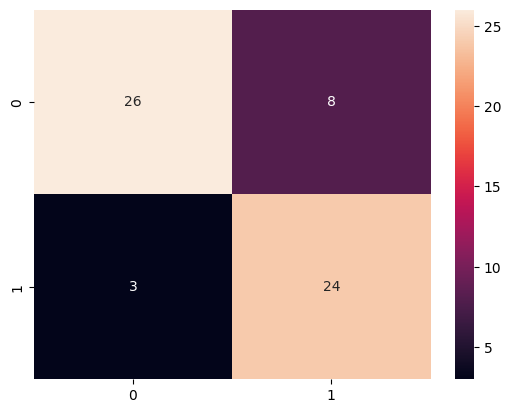

In [34]:
sns.heatmap(c, annot=True, fmt='d')

In [35]:
sv = SVC()

In [36]:
sv.fit(xtrain, ytrain)

SVC()

In [37]:
sv.score(xtest, ytest)

0.8032786885245902

In [38]:
a= sv.predict(xtest)
print(a)

[1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


In [39]:
rfc = RandomForestClassifier(n_estimators=200)

In [40]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc.score(xtest, ytest)

0.8688524590163934

In [42]:
b= rfc.predict(xtest)
print(b)

[1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


In [43]:
rfm = cross_val_score(rfc, X= xtrain, y=ytrain, cv= 10)

In [44]:
rfm.mean()

0.8048333333333334

In [66]:
y_test_pred = rfc.predict(xtest)
a = classification_report(ytest, y_test_pred)
print(a)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.83      0.89      0.86        27

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [83]:
data = """
63	1	3	145	233	1	0	150	0	2.3	0	0	1	
37	1	2	130	250	0	1	187	0	3.5	0	0	2	
41	0	1	130	204	0	0	172	0	1.4	2	0	2	
56	1	1	120	236	0	1	178	0	0.8	2	0	2	
57	0	0	120	354	0	1	163	1	0.6	2	0	2	
57	1	0	140	192	0	1	148	0	0.4	1	0	1	
56	0	1	140	294	0	0	153	0	1.3	1	0	2	
44	1	1	120	263	0	1	173	0	0.0	2	0	3	
52	1	2	172	199	1	1	162	0	0.5	2	0	3	
57	1	2	150	168	0	1	174	0	1.6	2	0	2	
54	1	0	140	239	0	1	160	0	1.2	2	0	2	
48	0	2	130	275	0	1	139	0	0.2	2	0	2	
49	1	1	130	266	0	1	171	0	0.6	2	0	2	
64	1	3	110	211	0	0	144	1	1.8	1	0	2	
58	0	3	150	283	1	0	162	0	1.0	2	0	2	"""

# Split the data into lines
lines = data.strip().split('\n')

# Initialize an empty list to store arrays
arrays = []
count = 0
# Iterate over each line and split it into values, converting them to appropriate types
for line in lines:
    # Split the line using tabs and remove any leading/trailing whitespace from the values
    values = line.strip().split('\t')
    # Filter out any empty strings from the values list
    values = [value for value in values if value.strip()]
    # Convert values to integers or floats as appropriate
    values = [int(value) if value.isdigit() else float(value) for value in values]
    arrays.append(values)

# Print the arrays
for array in arrays:
    print(array)
    input_features = [array]
    numpy_array = np.array(input_features)
    reshape_array = numpy_array.reshape(1,-1)
    prediction = rfc.predict(reshape_array)
    print(prediction)
    if prediction[0] == 0:
      print("you have lower risk of getting heart attack")
    else:
      print("Warning! you have high risk of getting heart attack")
      count = count + 1
      
print("Predict correct ",count)

[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
[0]
you have lower risk of getting heart attack
[37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]
[0]
you have lower risk of getting heart attack
[41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]
[0]
you have lower risk of getting heart attack
[57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1]
[1]
Warning! you have high risk of getting heart attack
[56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]
[1]
Warning! you have high risk of getting heart attack
[52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3]
[1]
Warning! you have high risk of getting heart attack
[57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2]
[1]
Warning! you have high ris

In [45]:
kn = KNeighborsClassifier(n_neighbors=5)

In [46]:
kn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [47]:
kn.score(xtest, ytest)

0.7868852459016393

In [48]:
read_data.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [49]:
input_features = [[29,1,0,120,190,0,1,130,1,1,3,0,0]]

In [50]:
numpy_array = np.array(input_features)

In [51]:
reshape_array = numpy_array.reshape(1,-1)

In [52]:
prediction = kn.predict(reshape_array)
print(prediction)

[1]


In [64]:
y_test_pred = kn.predict(xtest)

In [65]:
a = classification_report(ytest, y_test_pred)
print(a)

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        34
           1       0.72      0.85      0.78        27

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [86]:
data = """
63	1	3	145	233	1	0	150	0	2.3	0	0	1	
37	1	2	130	250	0	1	187	0	3.5	0	0	2	
41	0	1	130	204	0	0	172	0	1.4	2	0	2	
56	1	1	120	236	0	1	178	0	0.8	2	0	2	
57	0	0	120	354	0	1	163	1	0.6	2	0	2	
57	1	0	140	192	0	1	148	0	0.4	1	0	1	
56	0	1	140	294	0	0	153	0	1.3	1	0	2	
44	1	1	120	263	0	1	173	0	0.0	2	0	3	
52	1	2	172	199	1	1	162	0	0.5	2	0	3	
57	1	2	150	168	0	1	174	0	1.6	2	0	2	
54	1	0	140	239	0	1	160	0	1.2	2	0	2	
48	0	2	130	275	0	1	139	0	0.2	2	0	2	
49	1	1	130	266	0	1	171	0	0.6	2	0	2	
64	1	3	110	211	0	0	144	1	1.8	1	0	2	
58	0	3	150	283	1	0	162	0	1.0	2	0	2	"""

# Split the data into lines
lines = data.strip().split('\n')

# Initialize an empty list to store arrays
arrays = []
count = 0
# Iterate over each line and split it into values, converting them to appropriate types
for line in lines:
    # Split the line using tabs and remove any leading/trailing whitespace from the values
    values = line.strip().split('\t')
    # Filter out any empty strings from the values list
    values = [value for value in values if value.strip()]
    # Convert values to integers or floats as appropriate
    values = [int(value) if value.isdigit() else float(value) for value in values]
    arrays.append(values)

# Print the arrays
for array in arrays:
    print(array)
    input_features = [array]
    numpy_array = np.array(input_features)
    reshape_array = numpy_array.reshape(1,-1)
    prediction = kn.predict(reshape_array)
    print(prediction)
    if prediction[0] == 0:
      print("you have lower risk of getting heart attack")
    else:
      print("Warning! you have high risk of getting heart attack")
      count = count + 1
      
print("Predict correct ",count)

[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
[1]
Warning! you have high risk of getting heart attack
[37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1]
[1]
Warning! you have high risk of getting heart attack
[56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2]
[1]
Warning! you have high risk of getting heart attack
[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]
[1]
Warning! you have high risk of getting heart attack
[52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3]
[1]
Warning! you have high risk of getting heart attack
[57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2]
[1]
Wa

In [ ]:
import pickle
with open('project_model.pkl', 'wb') as file:
    pickle.dump(kn, file)

In [53]:
if prediction[0] == 0:
    print("you have lower risk of getting heart attack")
else:
    print("Warning! you have high risk of getting heart attack")

Warning! you have high risk of getting heart attack
